In [2]:
pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 2.5 MB/s eta 0:00:00


In [7]:
import seaborn as sns
import pandas as pd
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import random
import seaborn as sns
from controlador import GrafoControlador
from modelo import GrafoModelo
from vista import GrafoVista

Loading traffic data from URL...
Traffic data loaded successfully.
Filtering relevant columns...
                speed  travel_time    status        id   link_id
speed        1.000000    -0.107775  0.687263  0.151602 -0.170095
travel_time -0.107775     1.000000  0.284398 -0.136645 -0.075264
status       0.687263     0.284398  1.000000  0.077344 -0.212812
id           0.151602    -0.136645  0.077344  1.000000 -0.044232
link_id     -0.170095    -0.075264 -0.212812 -0.044232  1.000000


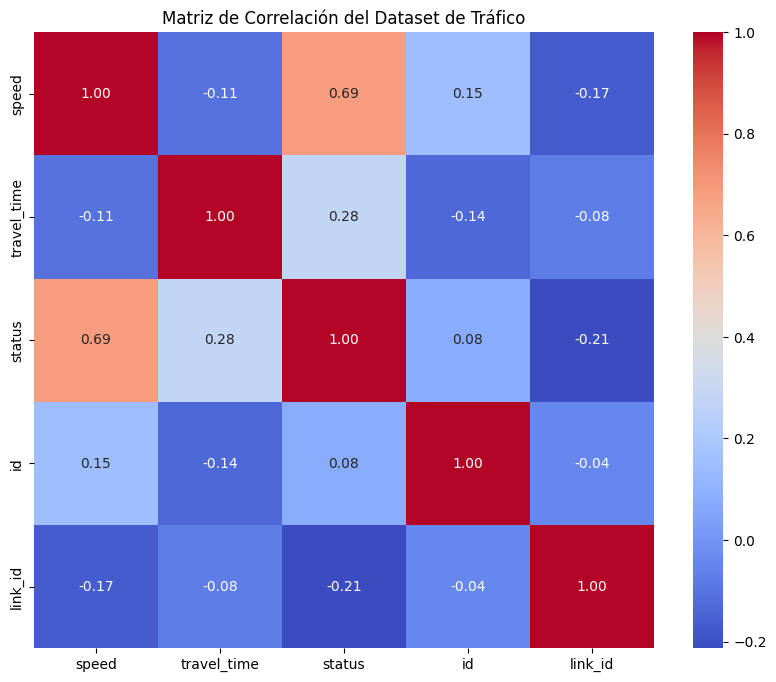

Initializing GrafoModelo with filtered data...
GrafoModelo initialized successfully.
Loading graph data...
Error loading graph data: Invalid file path or buffer object type: <class 'pandas.core.frame.DataFrame'>
Error in pathfinding or bee algorithm execution: 'NoneType' object has no attribute 'graph'


In [30]:
def main():
    # URL del dataset de tráfico de NYC Open Data
    traffic_data_url = "https://data.cityofnewyork.us/resource/i4gi-tjb9.csv"

    # Cargar el dataset
    print("Loading traffic data from URL...")
    traffic_data = pd.read_csv(traffic_data_url)
    print("Traffic data loaded successfully.")

    relevant_columns = ['speed', 'travel_time', 'status', 'id', 'link_id']
    print("Filtering relevant columns...")
    traffic_data_filtered = traffic_data[relevant_columns].apply(pd.to_numeric, errors='coerce')
    traffic_data_filtered = traffic_data_filtered.dropna()

    correlation_matrix = traffic_data_filtered.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matriz de Correlación del Dataset de Tráfico')
    plt.show()

    data = traffic_data_filtered
    print("Initializing GrafoModelo with filtered data...")
    modelo = GrafoModelo(data)
    print("GrafoModelo initialized successfully.")
    vista = GrafoVista()
    controlador = GrafoControlador(modelo, vista)

    # Cargar el grafo
    print("Loading graph data...")
    try:
        modelo.cargar_datos()
        print("Graph data loaded successfully.")
    except ValueError as e:
        print(f"Error loading graph data: {e}")

    # Ejemplo de coordenadas
    start_coords = (40.7580, -73.9855)  # Coordenadas de inicio
    end_coords = (40.7615, -73.9777)    # Coordenadas de fin

    try:
        start_node = modelo.coords_to_node(start_coords)
        end_node = modelo.coords_to_node(end_coords)
        controlador.ejecutar(start_node, end_node)

        # Ejemplo de ejecución del algoritmo de abejas
        controlador.ejecutar_abejas(start_node, end_node)
    except Exception as e:
        print(f"Error in pathfinding or bee algorithm execution: {e}")

if __name__ == '__main__':
    main()
